## Rxday, all models together

extremes for individual gridboxes (rx1day, rx5day) for time period, averaged over the domain \
rx1day - maximum daily precipitation rate for each gridbox over a time period \
rx5day - maximum 5 day rolling average precipitation rate for each gridbox over a time period

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [2]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


In [3]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_pr_rxday_' + experiment + '.nc'
path = folder + '/' + fileName
rxday = xr.open_dataset(path)
rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 ...
    rx5day   (time, lat, lon) float32 ...

In [4]:
rxday_options = [
    'rx1day',
    # 'rx5day'
    ]
rxday_option = rxday_options[0]

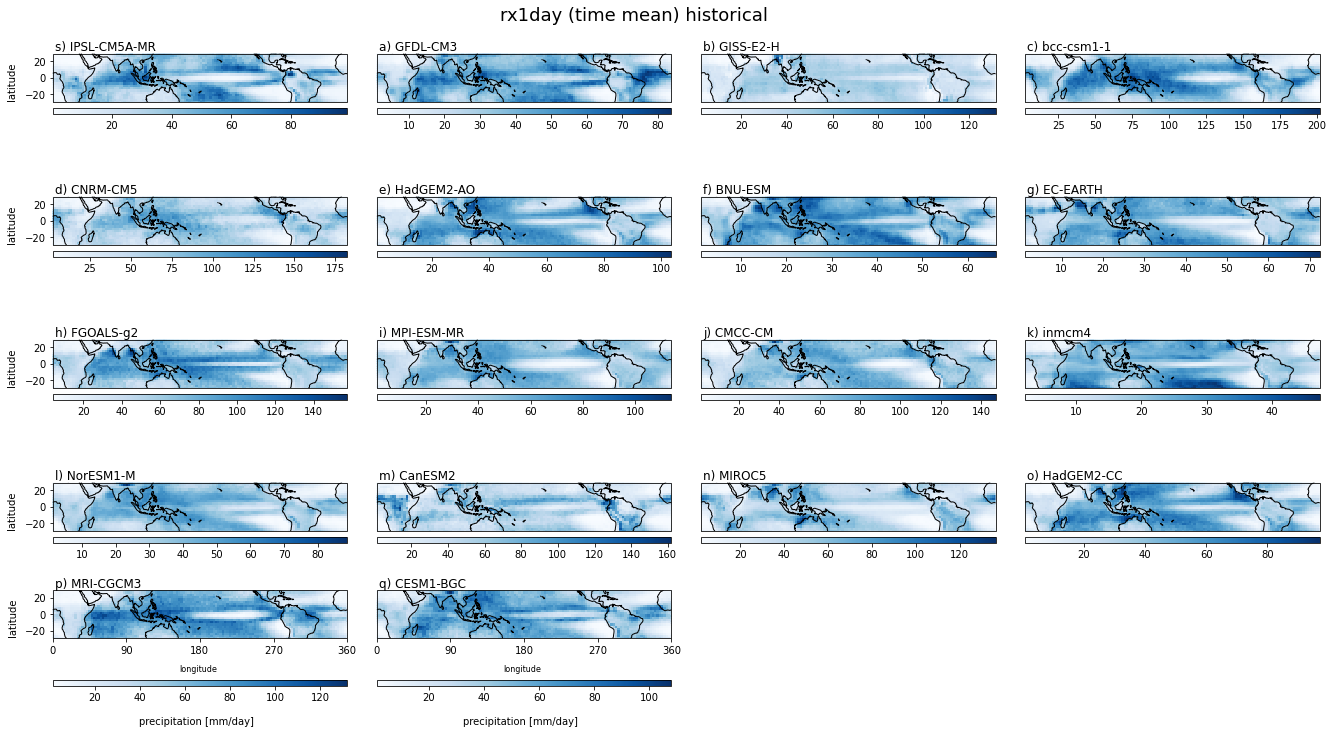

In [5]:
fig= plt.figure(figsize=(22,12))
#fig.suptitle("Rx5day (annual)", fontsize=18, y=0.95)

lat = rxday.lat
lon = rxday.lon
lonm,latm = np.meshgrid(lon,lat)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)

    ax= fig.add_subplot(5,4,i+1, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    #z = np.transpose(z)

    pcm= ax.pcolormesh(lonm,latm, rxday[rxday_option].mean(dim='time'),transform=ccrs.PlateCarree(),zorder=0, cmap='Blues') #,vmin=0,vmax=12)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + model, fontsize=12)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>=16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'precipitation [mm/day]',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=




plt.text(-30,725, rxday_option + ' (time mean) ' + experiment,fontsize=18)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1) #, hspace=0.2)

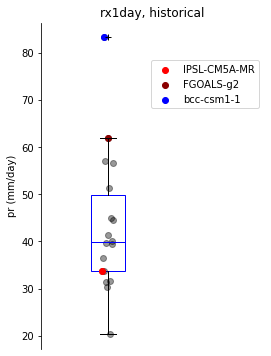

In [6]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y = np.append(y, rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time'))

plt.figure(figsize=(4,6))
plt.xlim(0,1)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title(rxday_option + ', ' + experiment)
plt.ylabel('pr (mm/day)')
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

sns.despine(top=True, right=True, left=False, bottom=True)

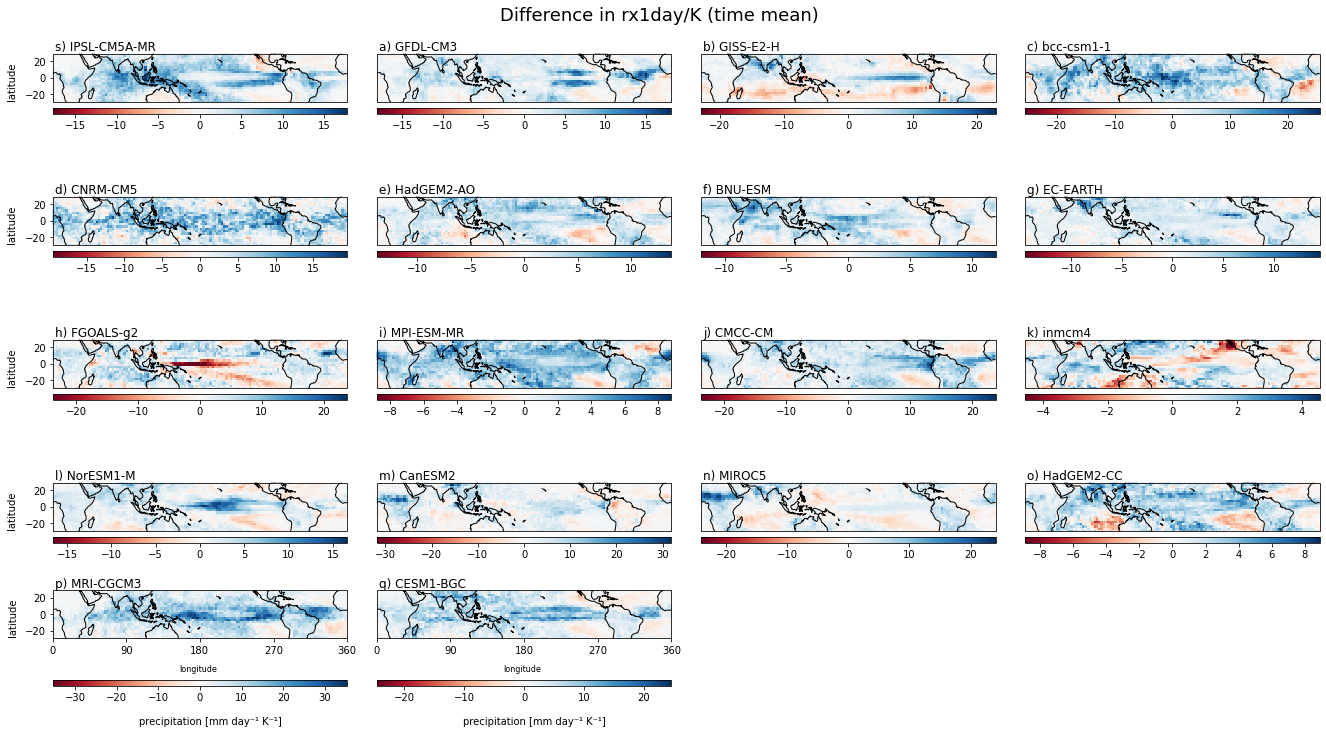

In [7]:
fig= plt.figure(figsize=(22,12))
#fig.suptitle("Rx5day (annual)", fontsize=18, y=0.95)

lat = rxday.lat
lon = rxday.lon
lonm,latm = np.meshgrid(lon,lat)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical

    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday_historical = xr.open_dataset(path)

    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday_rcp = xr.open_dataset(path)


    rxday_diffData = (rxday_rcp[rxday_option].mean(dim='time') -rxday_historical[rxday_option].mean(dim='time'))/tas_diff.values
    rxday_diff = xr.DataArray(
        data  = rxday_diffData,
        dims=['lat', 'lon'],
        coords={'lat': rxday_historical.lat.data, 'lon': rxday_historical.lon.data})

    ax= fig.add_subplot(5,4,i+1, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    #z = np.transpose(z)

    pcm= ax.pcolormesh(lonm,latm, rxday_diff,transform=ccrs.PlateCarree(),zorder=0, cmap="RdBu", vmin=-np.max(rxday_diff.values), vmax=np.max(rxday_diff.values)) #,vmin=0,vmax=12)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + model, fontsize=12)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>=16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'precipitation [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, aspect=50, fraction=0.055) #shrink=




plt.text(-30,725, 'Difference in ' + rxday_option + '/K (time mean)',fontsize=18)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1) #, hspace=0.2)

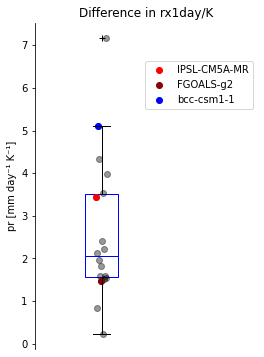

In [8]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday_historical = xr.open_dataset(path)

    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday_rcp = xr.open_dataset(path)


    rxday_diff = (rxday_rcp[rxday_option].weighted(np.cos(np.deg2rad(rxday_historical.lat))).mean(dim=('lat','lon')).mean(dim='time') -rxday_historical[rxday_option].weighted(np.cos(np.deg2rad(rxday_historical.lat))).mean(dim=('lat','lon')).mean(dim='time'))/tas_diff.values

    y = np.append(y, rxday_diff)

plt.figure(figsize=(4,6))
plt.xlim(0,1)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title('Difference in ' + rxday_option + '/K')
plt.ylabel('pr [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

sns.despine(top=True, right=True, left=False, bottom=True)

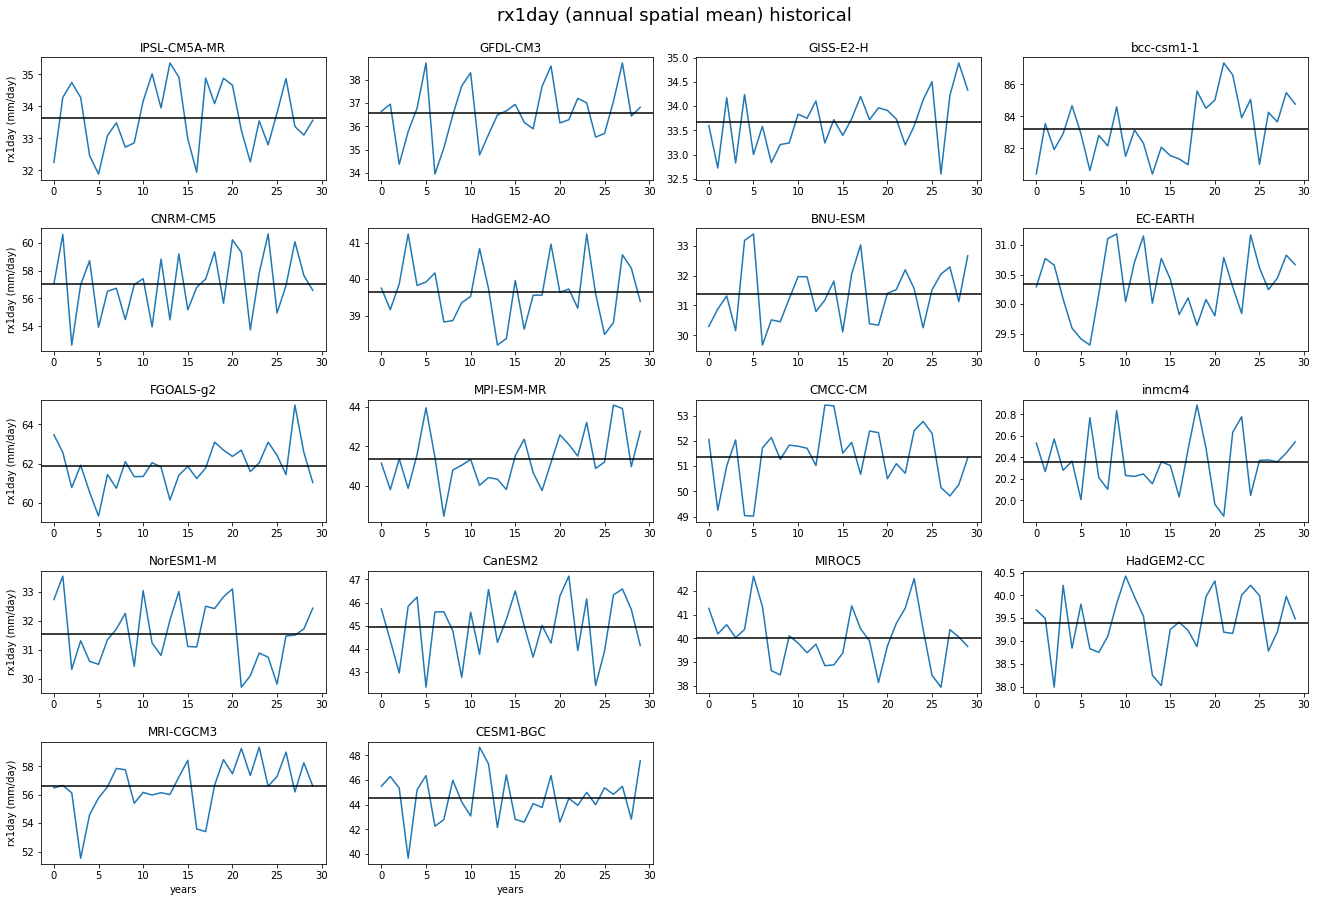

In [9]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(rxday_option + ' (annual spatial mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)

    ax.plot(rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')))
    ax.axhline(y=rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('time','lat','lon')), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(rxday_option + ' (mm/day)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

    #letters='abcdefghijklmnopqrs'
    #ax.title(model)
    #plt.text(-177.5, 32.5, letters[i-1] + ') ' + model + ' ' + 'Rx1day ' + experiment, fontsize=12)